In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import constants

In [2]:
df=pd.read_excel('/content/Career data_PDA_4053 (5).xlsx')
df.head()

,Field of Study,Current Occupation,Age,Gender,Years of Experience,Education Level,Industry Growth Rate,Job Satisfaction,Work-Life Balance,Job Opportunities,...,Job Security,Career Change Interest,Skills Gap,Certifications,Freelancing Experience,Geographic Mobility,Professional Networks,Career Change Events,Technology Adoption,Likely to Change Occupation
0,Medicine,Business Analyst,48.0,Male,7.0,High School,High,7.0,10.0,83.0,...,8.0,0,8.0,0,0.0,1,2.0,0.0,1.0,0.0
1,Education,Economist,44.0,Male,26.0,Master's,Low,10.0,3.0,55.0,...,9.0,0,3.0,0,1.0,1,2.0,1.0,9.0,0.0
2,Education,Biologist,21.0,Female,27.0,Master's,NaN,8.0,3.0,78.0,...,4.0,0,4.0,0,0.0,0,2.0,1.0,2.0,0.0
3,Education,Business Analyst,33.0,Male,14.0,PhD,Medium,7.0,9.0,NaN,...,5.0,0,NaN,0,0.0,0,9.0,0.0,1.0,0.0
4,Arts,Doctor,28.0,Female,0.0,PhD,Low,3.0,1.0,8.0,...,3.0,0,5.0,0,1.0,0,2.0,0.0,7.0,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Field of Study               4999 non-null   object 
 1   Current Occupation           4996 non-null   object 
 2   Age                          4996 non-null   float64
 3   Gender                       4993 non-null   object 
 4   Years of Experience          4998 non-null   float64
 5   Education Level              4994 non-null   object 
 6   Industry Growth Rate         4995 non-null   object 
 7   Job Satisfaction             4998 non-null   float64
 8   Work-Life Balance            4997 non-null   float64
 9   Job Opportunities            4993 non-null   float64
 10  Salary                       4994 non-null   object 
 11  Job Security                 4996 non-null   float64
 12  Career Change Interest       4995 non-null   object 
 13  Skills Gap        

In [4]:
df.describe()

,Age,Years of Experience,Job Satisfaction,Work-Life Balance,Job Opportunities,Job Security,Skills Gap,Freelancing Experience,Professional Networks,Career Change Events,Technology Adoption,Likely to Change Occupation
count,4996.000000,4998.000000,4998.000000,4997.000000,4993.000000,4996.000000,4995.000000,4994.000000,4994.000000,4998.000000,4996.000000,4999.000000
mean,39.364892,19.774310,5.496399,5.521513,50.622672,5.523419,5.538739,0.150781,5.511414,0.995798,5.484588,0.570714
std,11.457086,11.527082,2.895880,2.901469,29.025295,2.876791,2.884482,0.357871,2.868290,0.818403,2.869529,0.495024
min,20.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,29.000000,10.000000,3.000000,3.000000,25.000000,3.000000,3.000000,0.000000,3.000000,0.000000,3.000000,0.000000
50%,40.000000,20.000000,6.000000,6.000000,50.000000,6.000000,6.000000,0.000000,6.000000,1.000000,5.000000,1.000000
75%,49.000000,30.000000,8.000000,8.000000,76.000000,8.000000,8.000000,0.000000,8.000000,2.000000,8.000000,1.000000
max,59.000000,39.000000,10.000000,10.000000,100.000000,10.000000,10.000000,1.000000,10.000000,2.000000,10.000000,1.000000


In [5]:
df['Salary']=pd.to_numeric(df['Salary'], errors='coerce')
df['Salary'].fillna(df['Salary'].median(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Field of Study               4999 non-null   object 
 1   Current Occupation           4996 non-null   object 
 2   Age                          4996 non-null   float64
 3   Gender                       4993 non-null   object 
 4   Years of Experience          4998 non-null   float64
 5   Education Level              4994 non-null   object 
 6   Industry Growth Rate         4995 non-null   object 
 7   Job Satisfaction             4998 non-null   float64
 8   Work-Life Balance            4997 non-null   float64
 9   Job Opportunities            4993 non-null   float64
 10  Salary                       5000 non-null   float64
 11  Job Security                 4996 non-null   float64
 12  Career Change Interest       4995 non-null   object 
 13  Skills Gap        

/tmp/ipython-input-4078275587.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Salary'].fillna(df['Salary'].median(), inplace=True)


In [6]:
#converting float value into integer
df['Age']=df['Age'].astype('Int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Field of Study               4999 non-null   object 
 1   Current Occupation           4996 non-null   object 
 2   Age                          4996 non-null   Int64  
 3   Gender                       4993 non-null   object 
 4   Years of Experience          4998 non-null   float64
 5   Education Level              4994 non-null   object 
 6   Industry Growth Rate         4995 non-null   object 
 7   Job Satisfaction             4998 non-null   float64
 8   Work-Life Balance            4997 non-null   float64
 9   Job Opportunities            4993 non-null   float64
 10  Salary                       5000 non-null   float64
 11  Job Security                 4996 non-null   float64
 12  Career Change Interest       4995 non-null   object 
 13  Skills Gap        

In [7]:
df['Years of Experience'].fillna(df['Years of Experience'].mode()[0],inplace=True)
df['Age'].fillna(df['Age'].mode()[0],inplace=True)

/tmp/ipython-input-1033599642.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Years of Experience'].fillna(df['Years of Experience'].mode()[0],inplace=True)
/tmp/ipython-input-1033599642.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].me

In [8]:
#checking missing value
print(df.isnull().sum())


Field of Study                 1
Current Occupation             4
Age                            0
Gender                         7
Years of Experience            0
Education Level                6
Industry Growth Rate           5
Job Satisfaction               2
Work-Life Balance              3
Job Opportunities              7
Salary                         0
Job Security                   4
Career Change Interest         5
Skills Gap                     5
Certifications                 5
Freelancing Experience         6
Geographic Mobility            4
Professional Networks          6
Career Change Events           2
Technology Adoption            4
Likely to Change Occupation    1
dtype: int64


In [9]:
df=df.drop_duplicates()
df.isnull().sum()

,0
Field of Study,1
Current Occupation,4
Age,0
Gender,7
Years of Experience,0
Education Level,6
Industry Growth Rate,5
Job Satisfaction,2
Work-Life Balance,3
Job Opportunities,7


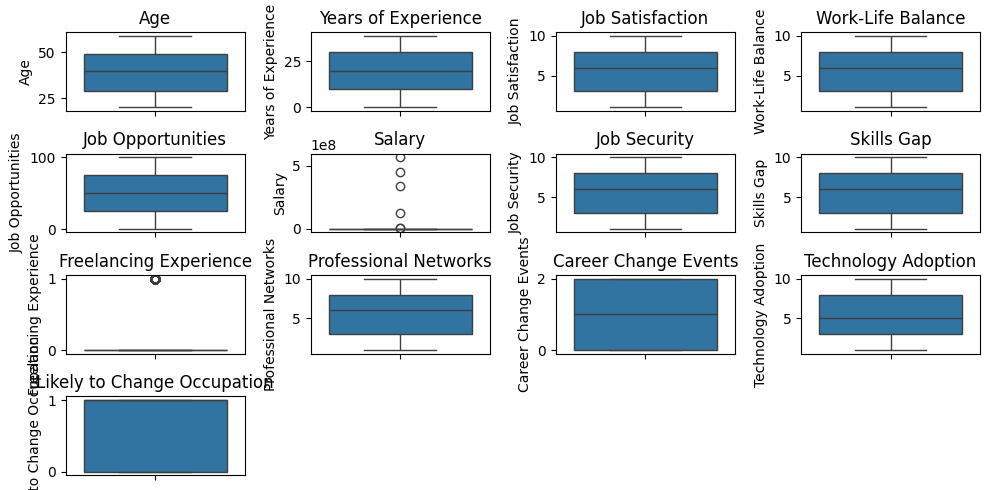

In [10]:
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(10,5)) # Adjust figure size based on the number of rows

for i, col in enumerate(numerical_cols):
    plt.subplot(4,4 , i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [11]:
#handling missing values
num_cols=df.select_dtypes(include=['int64','float64']).columns
cat_cols=df.select_dtypes(include=['object']).columns
df[num_cols]=df[num_cols].fillna(df[num_cols].median())
for col in cat_cols:
  df[col]=df[col].fillna(df[col].mode()[0])
df.isnull().sum()

,0
Field of Study,0
Current Occupation,0
Age,0
Gender,0
Years of Experience,0
Education Level,0
Industry Growth Rate,0
Job Satisfaction,0
Work-Life Balance,0
Job Opportunities,0


In [12]:
stats_before = df[num_cols].describe()
display(stats_before)

,Age,Years of Experience,Job Satisfaction,Work-Life Balance,Job Opportunities,Salary,Job Security,Skills Gap,Freelancing Experience,Professional Networks,Career Change Events,Technology Adoption,Likely to Change Occupation
count,5000.0,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,39.367,19.779200,5.496600,5.521800,50.621800,4.148748e+05,5.523800,5.539200,0.150600,5.512000,0.99580,5.484200,0.570800
std,11.452744,11.527368,2.895318,2.900622,29.004976,1.148965e+07,2.875672,2.883076,0.357694,2.866618,0.81824,2.868413,0.495011
min,20.0,0.000000,1.000000,1.000000,1.000000,3.001600e+04,1.000000,1.000000,0.000000,1.000000,0.00000,1.000000,0.000000
25%,29.0,10.000000,3.000000,3.000000,25.000000,7.354325e+04,3.000000,3.000000,0.000000,3.000000,0.00000,3.000000,0.000000
50%,40.0,20.000000,6.000000,6.000000,50.000000,1.164240e+05,6.000000,6.000000,0.000000,6.000000,1.00000,5.000000,1.000000
75%,49.0,30.000000,8.000000,8.000000,76.000000,1.581780e+05,8.000000,8.000000,0.000000,8.000000,2.00000,8.000000,1.000000
max,59.0,39.000000,10.000000,10.000000,100.000000,5.678965e+08,10.000000,10.000000,1.000000,10.000000,2.00000,10.000000,1.000000


In [13]:
# step 4
num_cols = df.select_dtypes(include=np.number).columns

In [14]:
# after cleaning
stats_after = df[num_cols].describe()
display(stats_after)

,Age,Years of Experience,Job Satisfaction,Work-Life Balance,Job Opportunities,Salary,Job Security,Skills Gap,Freelancing Experience,Professional Networks,Career Change Events,Technology Adoption,Likely to Change Occupation
count,5000.0,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,39.367,19.779200,5.496600,5.521800,50.621800,4.148748e+05,5.523800,5.539200,0.150600,5.512000,0.99580,5.484200,0.570800
std,11.452744,11.527368,2.895318,2.900622,29.004976,1.148965e+07,2.875672,2.883076,0.357694,2.866618,0.81824,2.868413,0.495011
min,20.0,0.000000,1.000000,1.000000,1.000000,3.001600e+04,1.000000,1.000000,0.000000,1.000000,0.00000,1.000000,0.000000
25%,29.0,10.000000,3.000000,3.000000,25.000000,7.354325e+04,3.000000,3.000000,0.000000,3.000000,0.00000,3.000000,0.000000
50%,40.0,20.000000,6.000000,6.000000,50.000000,1.164240e+05,6.000000,6.000000,0.000000,6.000000,1.00000,5.000000,1.000000
75%,49.0,30.000000,8.000000,8.000000,76.000000,1.581780e+05,8.000000,8.000000,0.000000,8.000000,2.00000,8.000000,1.000000
max,59.0,39.000000,10.000000,10.000000,100.000000,5.678965e+08,10.000000,10.000000,1.000000,10.000000,2.00000,10.000000,1.000000


In [15]:
print("After:", stats_after)

After:              Age  Years of Experience  Job Satisfaction  Work-Life Balance  \
count     5000.0          5000.000000       5000.000000        5000.000000   
mean      39.367            19.779200          5.496600           5.521800   
std    11.452744            11.527368          2.895318           2.900622   
min         20.0             0.000000          1.000000           1.000000   
25%         29.0            10.000000          3.000000           3.000000   
50%         40.0            20.000000          6.000000           6.000000   
75%         49.0            30.000000          8.000000           8.000000   
max         59.0            39.000000         10.000000          10.000000   

       Job Opportunities        Salary  Job Security   Skills Gap  \
count        5000.000000  5.000000e+03   5000.000000  5000.000000   
mean           50.621800  4.148748e+05      5.523800     5.539200   
std            29.004976  1.148965e+07      2.875672     2.883076   
min           

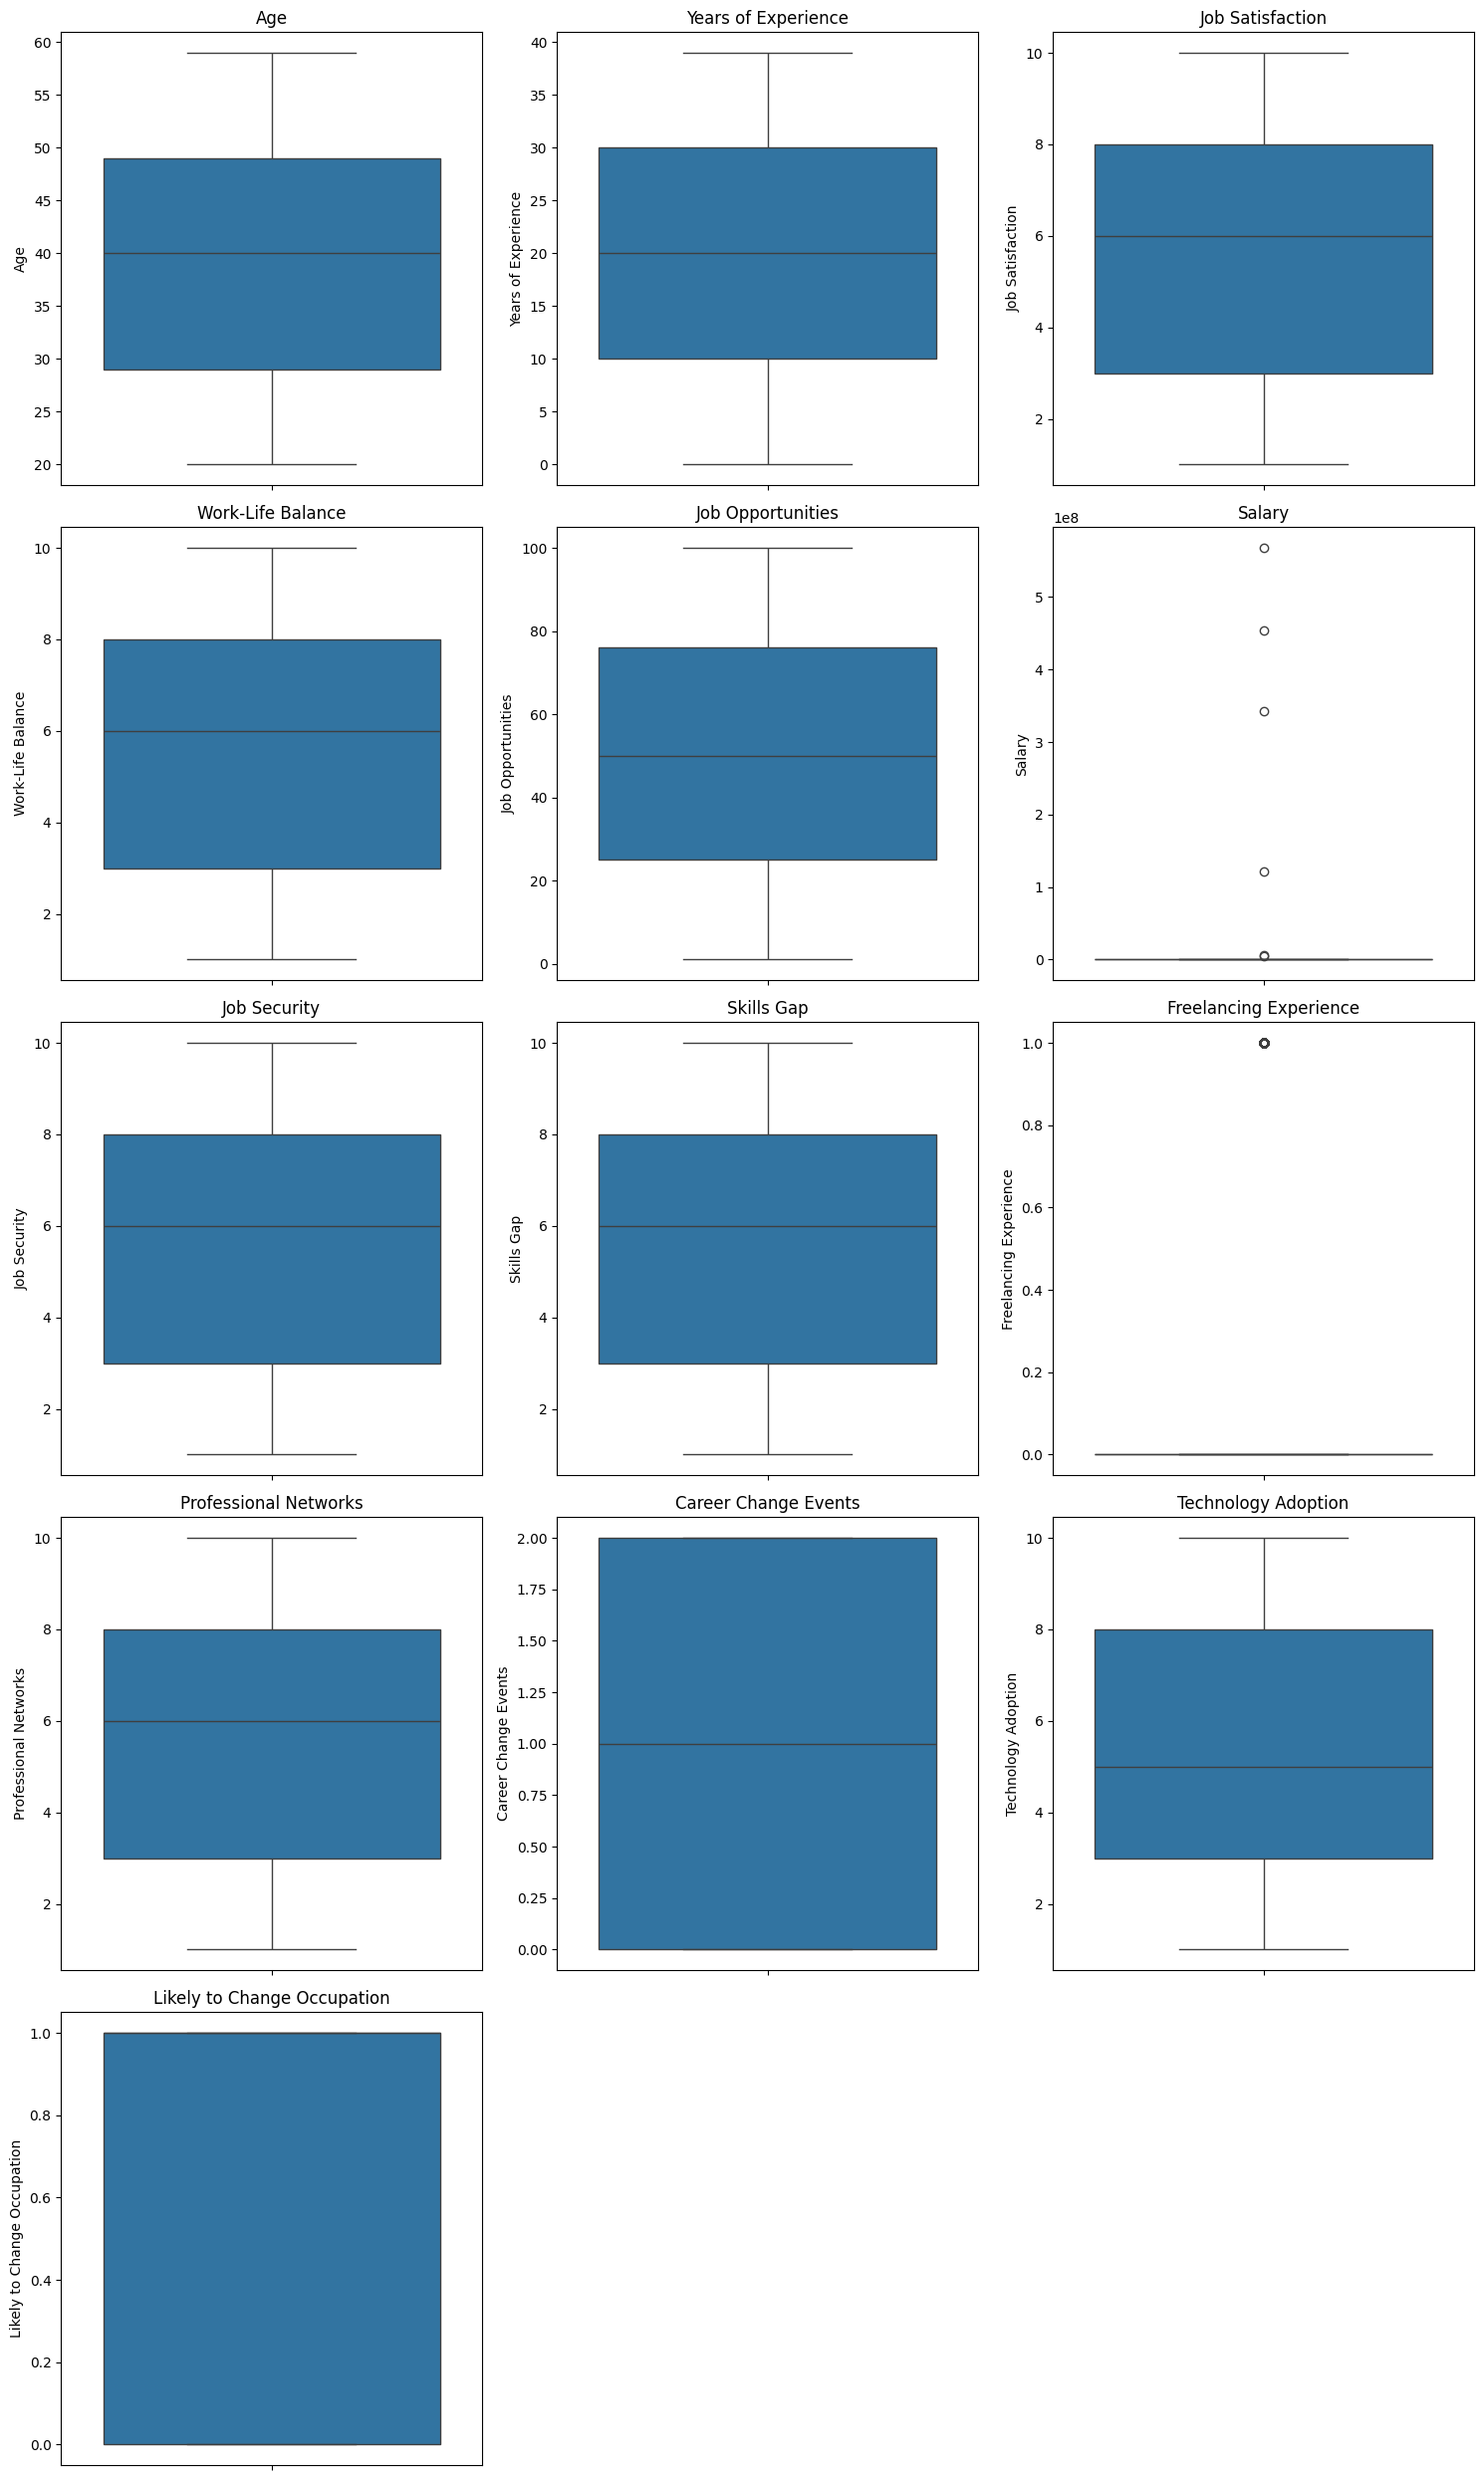

In [16]:
#selecting only numerical columns for boxplotting
numerical_cols = df.select_dtypes(include=np.number).columns
n_cols = len(numerical_cols)
n_rows = (n_cols + 2) // 3 # Calculate the number of rows needed
#create boxplots for each numerical column
plt.figure(figsize=(15, n_rows * 5)) # Adjust figure size based on the number of rows
for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

/tmp/ipython-input-1304920346.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Job Change")


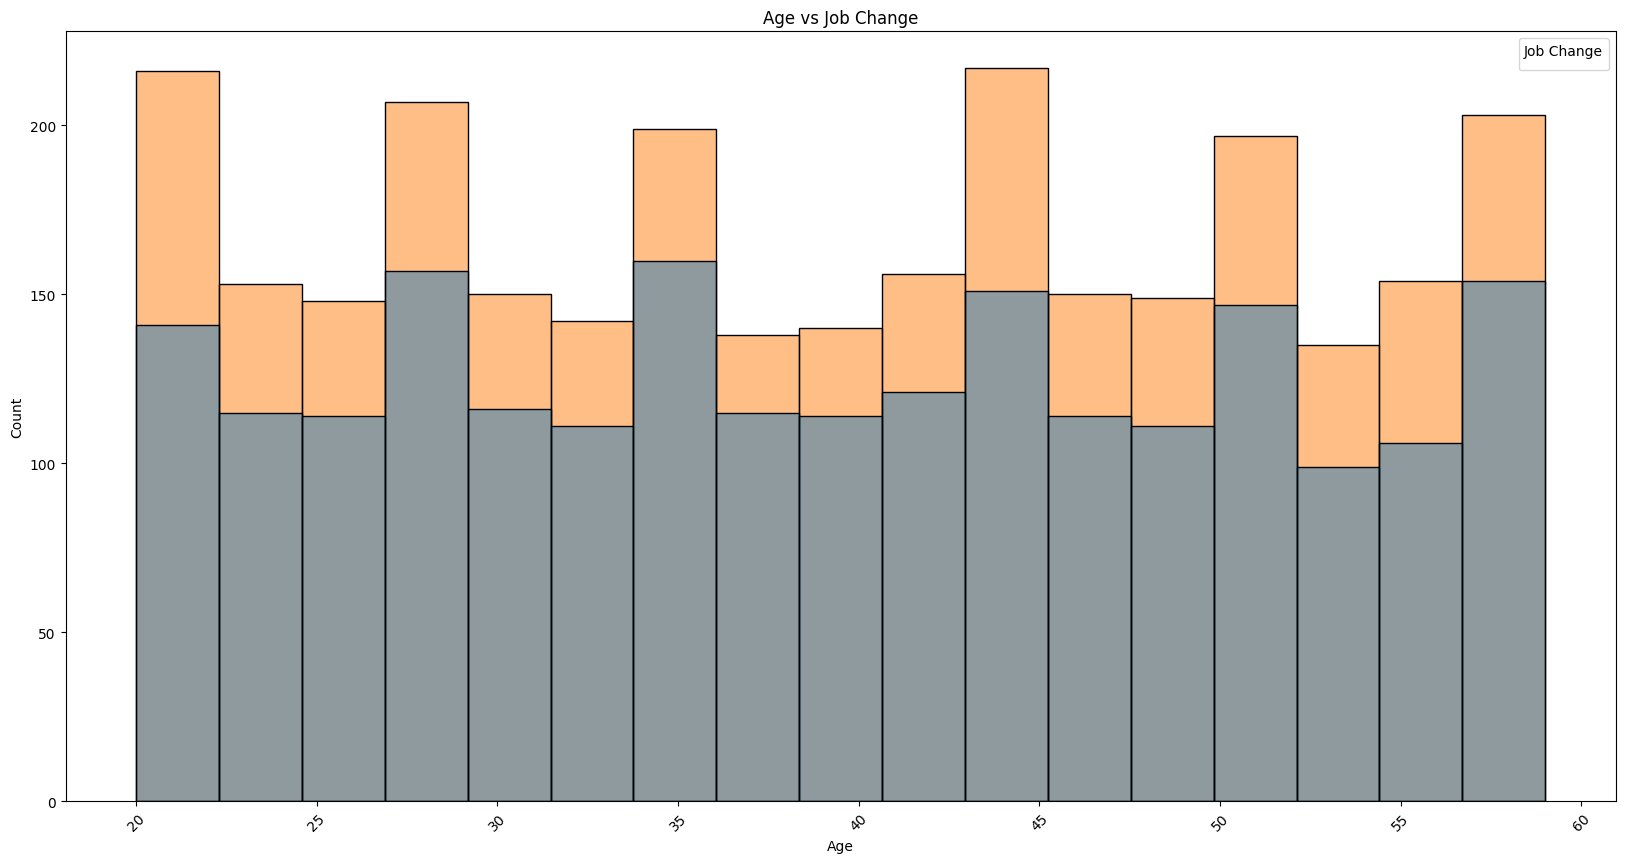

In [17]:
plt.figure(figsize=(20,10))
sns.histplot(data=df, x='Age',hue='Likely to Change Occupation')
plt.title("Age vs Job Change")
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title="Job Change")
plt.show()

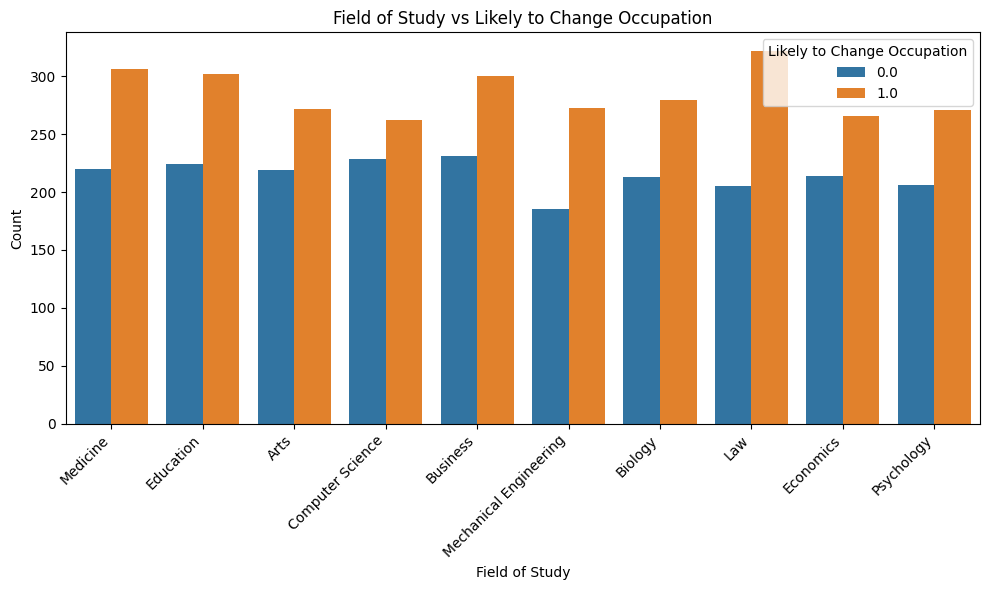

In [18]:
#Academic Background vs Job change
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Field of Study', hue='Likely to Change Occupation')
plt.xlabel('Field of Study')
plt.ylabel('Count')
plt.title('Field of Study vs Likely to Change Occupation')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

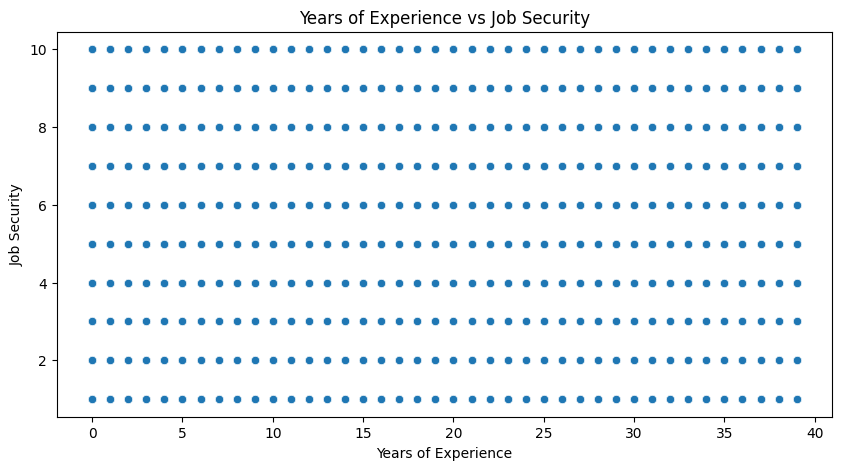

In [19]:
#work experience vs Job stability
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='Years of Experience', y='Job Security')
plt.xlabel('Years of Experience')
plt.ylabel('Job Security')
plt.title('Years of Experience vs Job Security')
plt.show()

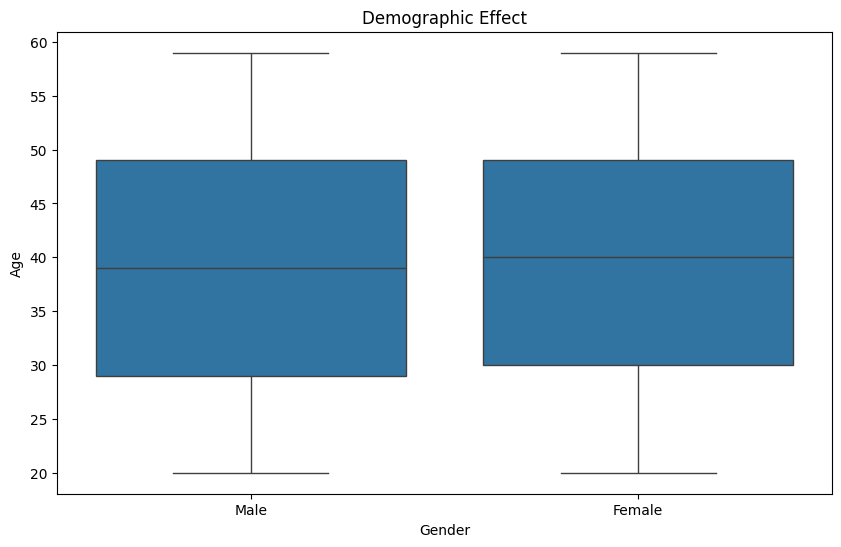

In [20]:
#demographic effect
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Gender', y='Age')
plt.title('Demographic Effect')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()